In [295]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from pandas.plotting import scatter_matrix

In [296]:
stock = pd.read_csv('data/nasdaq/AAPL.csv', index_col=0)
stock = stock[-1500:]
stock.index = pd.to_datetime(stock.index, format="%d-%m-%Y")
stock['MA50'] = stock['Open'].rolling(50).mean()
stock['MA200'] = stock['Open'].rolling(200).mean()
stock.head()

,Low,Open,Volume,High,Close,Adjusted Close,MA50,MA200
Date,,,,,,,,
2015-11-11,28.802500,29.092501,180872000,29.355000,29.027500,26.767387,NaN,NaN
2015-11-12,28.912500,29.065001,130102400,29.205000,28.930000,26.677477,NaN,NaN
2015-11-13,28.067499,28.799999,183249600,28.892500,28.084999,25.898272,NaN,NaN
2015-11-16,27.750000,27.844999,152426800,28.559999,28.545000,26.322456,NaN,NaN
2015-11-17,28.330000,28.730000,110467600,28.762501,28.422501,26.209492,NaN,NaN


# Definition of the portfolio

In [297]:
'''
Class of a Portfolio, 
Contains its value and what stocks there is inside.
value is a float
content is a dictionary with the symbol as a key and value the number of action in the portfolio
'''
class Portfolio:
    def __init__(self, value, content):
        self.__value = value
        self.__content = content
        
    def __str__(self):
        sentence = "This portfolio contains:\n"
        for i in self.__content.keys():
            sentence += str(i) +": "+ str(self.__content[i]) + "\n"
        return sentence
        
    def get_value(self):
        return self.__value
    
    def get_position(self):
        return self.__content
        
    def buy(self, action, number, price):
        print("BUY: " + str(number) + " | " + str(price))
        self.__value -= price*number
        self.__content[action] += number
        
    def sell(self, action, number, price):
        print("SELL: " + str(number) + " | " + str(price))
        self.__value += price*number
        self.__content[action] -= number
        
    def close_position(self, price):
        for i in self.__content.keys():
            if self.__content[i] > 0:
                self.sell(i, self.__content[i], price)
            elif self.__content[i] < 0:
                self.buy(i, -self.__content[i], price)
                

        

In [298]:
def strategy(stock, old_info, portfolio, date):
    if stock["MA50"][date]-stock["MA200"][date] > 0:
        new_info = True
    else:
        new_info = False
    
    if old_info^new_info:
        if not(new_info):
            portfolio.sell("AAPL", 15, stock["Open"][date])
        else: 
            portfolio.buy("AAPL", 10, stock["Open"][date])
    return new_info, portfolio

In [299]:
def strategy2(stock, old_info, portfolio, date):
    new_info = stock['Open'][date]
    if new_info - old_info > 0:
        portfolio.buy("AAPL", 1, stock["Open"][date])
    elif new_info - old_info < 0:
        portfolio.sell("AAPL", 1, stock["Open"][date])
    
    return new_info, portfolio

In [300]:
def display_process(symbol,data,portfolio, stocks_w_date, date):
    pos = portfolio.get_position()[symbol]
    if pos > 0:
        data.append([stocks_w_date,date, 'g'])
    elif pos < 0:
        data.append([stocks_w_date,date, 'r'])
    else:
        data.append([stocks_w_date,date, 'b'])
    return data

def display(data):
    values, dates, colors = list(), list(), list()
    k = 0
    for value,date, color in data:
        values.append(float(value))
        dates.append(k)
        k += 1
        colors.append(color)
    plt.scatter(dates, values,1, color=colors)
    # for i in range(len(color)):
    #     plt.scatter([dates], [values[i]], color=colors[i])
    plt.show()

In [301]:
def simulator(strategy, stocks):
    portfolio = Portfolio(0, {"AAPL":0})
    old_info = False
    data = list()
    for date in stocks.index[-1300:]:
        old_info, portfolio = strategy(stocks, old_info, portfolio, date)
        data = display_process("AAPL", data, portfolio, stock["Open"][date],date)
    portfolio.close_position(stock["Open"][date])
    display(data)
    print(portfolio.get_value())

In [302]:
def simulator2(strategy, stocks):
    portfolio = Portfolio(0, {"AAPL":0})
    old_info = stock['Open'][stock.index[-1300]]
    data = list()
    for date in stocks.index[-1300:]:
        old_info, portfolio = strategy2(stocks, old_info, portfolio, date)
        data = display_process("AAPL", data, portfolio, stock["Open"][date],date)
    portfolio.close_position(stock["Open"][date])
    display(data)
    print(portfolio.get_value())

SELL: 1 | 26.450000762939453
SELL: 1 | 26.415000915527344
BUY: 1 | 26.53499984741211
BUY: 1 | 26.924999237060547
BUY: 1 | 26.975000381469727
SELL: 1 | 26.957500457763672
SELL: 1 | 26.8125
SELL: 1 | 26.15999984741211
SELL: 1 | 25.662500381469727
BUY: 1 | 26.877500534057617
BUY: 1 | 27.1825008392334
BUY: 1 | 28.46500015258789
BUY: 1 | 28.780000686645508
BUY: 1 | 28.79750061035156
SELL: 1 | 28.262500762939453
BUY: 1 | 28.462499618530277
BUY: 1 | 28.587499618530277
BUY: 1 | 28.604999542236328
SELL: 1 | 27.90999984741211
BUY: 1 | 28.25
BUY: 1 | 28.42250061035156
SELL: 1 | 28.290000915527344
SELL: 1 | 28.114999771118164
BUY: 1 | 28.177499771118164
BUY: 1 | 28.26499938964844
BUY: 1 | 28.350000381469727
BUY: 1 | 28.424999237060547
BUY: 1 | 28.57749938964844
BUY: 1 | 28.7549991607666
BUY: 1 | 29.424999237060547
SELL: 1 | 29.337499618530277
SELL: 1 | 29.19750022888184
BUY: 1 | 29.46999931335449
SELL: 1 | 29.332500457763672
BUY: 1 | 29.545000076293945
SELL: 1 | 29.3125
SELL: 1 | 29.21500015258789

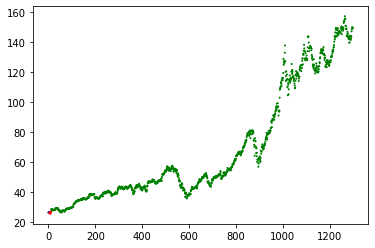

13753.495351791382


In [303]:
simulator2(strategy2, stock)